In [1]:
import numpy as np, matplotlib.pyplot as plt, seawater as sw, PWP
%matplotlib inline

In [2]:
# set up initial parameters (these are also set as defaults in the PWP code, so don't need to put them in)

T0 = 17; # reference temperature (degC)
S0 = 36; # reference salinity (parts per thousand; ppt)
rho0 = 1025; # reference density (kg m^-3)
alpha = -sw.alpha(36,17,0)*rho0 # thermal expansion   coefficient (kg m^-3 degC^-1)
beta = sw.beta(36,17,0)*rho0 # haline contraction coefficient (kg m^-3 ppt^-1 )
latitude = 40; # degrees north
f = sw.f(latitude) # planetary vorticity

## First test: SW and LW for 10 days

In [3]:
# define diurnal cycle
def get_insolation(t,amp=342,mean=342,phase=np.pi/2):
    return amp*np.sin(t/86400*2*np.pi - phase) + mean

# set up time
dt = 100; # seconds
t = np.arange(0,86400*10,dt)

# create initial profile
dz = .1
z = np.arange(dz/2,100,dz)
shape = (len(t),len(z))
Ts = np.empty(shape=shape)
Ss = np.empty(shape=shape)
Us = np.empty(shape=shape)
Vs = np.empty(shape=shape)
mld = np.empty(shape=t.shape)
Ts[0] = T0-z/100
Ss[0] = np.ones(len(z))*S0
Us[0] = np.zeros(len(z))
Vs[0] = np.ones(len(z))
mld[0] = 0;

# run model
for i in range(len(t)-1):
    I = get_insolation(t[i]); # solar heating
    L = -342; # OLR
    E = 0; # evaporation
    P = 0; # precipitation
    tau_x = 0; # zonal wind stress
    tau_y = 0; # meridional wind stress
    Ts[i+1],Ss[i+1],Us[i+1],Vs[i+1],mld[i+1] = PWP.model_timestep(Ts[i],Ss[i],Us[i],Vs[i],z,I,L,E,P,tau_x,tau_y,dt,return_MLD=True,T0=T0,S0=S0,rho0=rho0,alpha=alpha,beta=beta,f=f)
    

/Users/Zach/Google Drive/Research/global/PWP/PWP.py:184: RuntimeWarning: divide by zero encountered in true_divide
  Rg = g*np.diff(rho)*np.diff(z)/rho0/(np.diff(U)**2+np.diff(V)**2)
/Users/Zach/Google Drive/Research/global/PWP/PWP.py:184: RuntimeWarning: invalid value encountered in true_divide
  Rg = g*np.diff(rho)*np.diff(z)/rho0/(np.diff(U)**2+np.diff(V)**2)


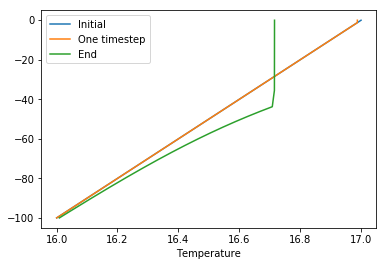

In [4]:
plt.plot(Ts[0],-z,label='Initial')
plt.plot(Ts[1],-z,label='One timestep')
plt.plot(Ts[-1],-z,label='End')
plt.legend(loc=0);
plt.xlabel('Temperature');

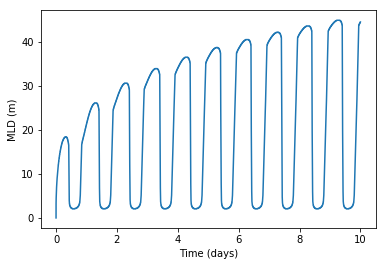

In [5]:
plt.plot(t/86400,mld)
plt.ylabel('MLD (m)');
plt.xlabel('Time (days)');

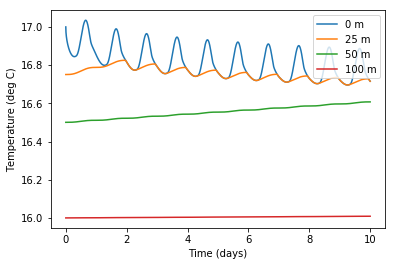

In [6]:
depths = [0,25,50,100]
for dep in depths:
    ind = np.argmin(np.abs(dep-z))
    plt.plot(t/86400,Ts[:,ind],label='%d m'%dep)
plt.ylabel('Temperature (deg C)');
plt.xlabel('Time (days)')
plt.legend(loc=0);

## Second test: Add in random zonal wind stress

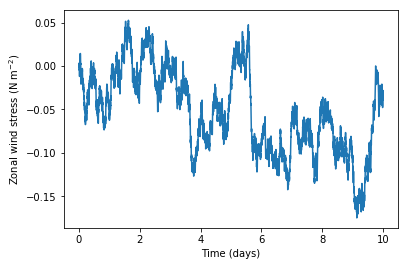

In [7]:
tau_x = np.cumsum(np.random.rand((len(t)))-.5)*1e-2
plt.plot(t/86400,tau_x)
plt.ylabel('Zonal wind stress (N m$^{-2}$)')
plt.xlabel('Time (days)');

In [8]:
# create initial profile
dz = .1
z = np.arange(dz/2,100,dz)
shape = (len(t),len(z))
Ts = np.empty(shape=shape)
Ss = np.empty(shape=shape)
Us = np.empty(shape=shape)
Vs = np.empty(shape=shape)
mld_1D = np.empty(shape=t.shape)
Ts[0] = T0-z/100
Ss[0] = np.ones(len(z))*S0
Us[0] = np.zeros(len(z))
Vs[0] = np.ones(len(z))
mld[0] = 0;

# run model
for i in range(len(t)-1):
    I = get_insolation(t[i],mean=342,amp=342*2); # solar heating
    L = -342; #d OLR
    E = 0; # evaporation
    P = 0; # precipitation
    tau_y = 0; # meridional wind stress
    Ts[i+1],Ss[i+1],Us[i+1],Vs[i+1],mld_1D[i+1] = PWP.model_timestep(Ts[i],Ss[i],Us[i],Vs[i],z,I,L,E,P,tau_x[i],tau_y,dt,return_MLD=True,T0=T0,S0=S0,rho0=rho0,alpha=alpha,beta=beta,f=f)
    

/Users/Zach/Google Drive/Research/global/PWP/PWP.py:184: RuntimeWarning: divide by zero encountered in true_divide
  Rg = g*np.diff(rho)*np.diff(z)/rho0/(np.diff(U)**2+np.diff(V)**2)
/Users/Zach/Google Drive/Research/global/PWP/PWP.py:184: RuntimeWarning: invalid value encountered in true_divide
  Rg = g*np.diff(rho)*np.diff(z)/rho0/(np.diff(U)**2+np.diff(V)**2)


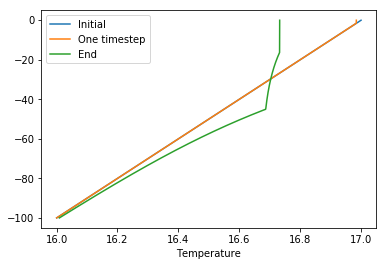

In [9]:
plt.plot(Ts[0],-z,label='Initial')
plt.plot(Ts[1],-z,label='One timestep')
plt.plot(Ts[-1],-z,label='End')
plt.legend(loc=0);
plt.xlabel('Temperature');

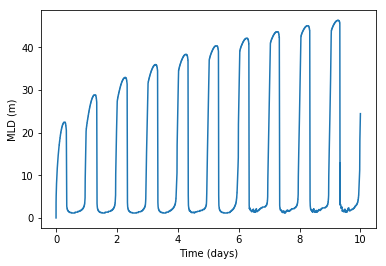

In [10]:
plt.plot(t/86400,mld_1D)
plt.ylabel('MLD (m)');
plt.xlabel('Time (days)');

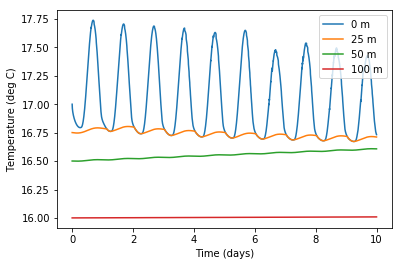

In [11]:
depths = [0,25,50,100]
for dep in depths:
    ind = np.argmin(np.abs(dep-z))
    plt.plot(t/86400,Ts[:,ind],label='%d m'%dep)
plt.ylabel('Temperature (deg C)');
plt.xlabel('Time (days)')
plt.legend(loc=0);

## Third test: Add in random meridional buoyancy gradient and submesoscale-parameterized heat fluxes

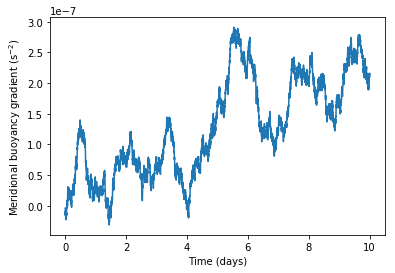

In [12]:
b_y = np.cumsum(np.random.rand((len(t)))-.5)*1e-8
plt.plot(t/86400,b_y)
plt.ylabel('Meridional buoyancy gradient (s$^{-2}$)')
plt.xlabel('Time (days)');

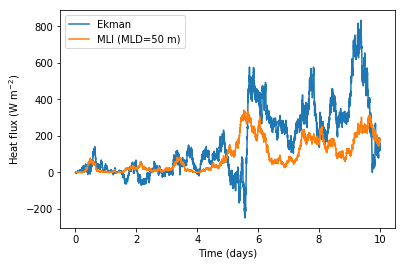

In [13]:
c = 4218
g = 9.81
Q_Ek = b_y*tau_x*c*rho0/(f*alpha*g)
MLI_flux=0.08*b_y**2*(c*rho0**2)/(f*(-alpha)*g)

plt.plot(t/86400,Q_Ek,label='Ekman')
plt.plot(t/86400,MLI_flux*50**2,label='MLI (MLD=50 m)');
plt.ylabel('Heat flux (W m$^{-2}$)')
plt.xlabel('Time (days)')
plt.legend(loc=0);

In [14]:
# create initial profile
dz = .1
z = np.arange(dz/2,100,dz)
shape = (len(t),len(z))
Ts = np.empty(shape=shape)
Ss = np.empty(shape=shape)
Us = np.empty(shape=shape)
Vs = np.empty(shape=shape)
mld_SM = np.empty(shape=t.shape)
Ts[0] = T0-z/100
Ss[0] = np.ones(len(z))*S0
Us[0] = np.zeros(len(z))
Vs[0] = np.ones(len(z))
mld[0] = 0;

# run model
for i in range(len(t)-1):
    I = get_insolation(t[i],mean=342,amp=342*2); # solar heating
    L = -342; #d OLR
    E = 0; # evaporation
    P = 0; # precipitation
    tau_y = 0; # meridional wind stress
    Ts[i+1],Ss[i+1],Us[i+1],Vs[i+1],mld_SM[i+1] = PWP.model_timestep(Ts[i],Ss[i],Us[i],Vs[i],z,I,L,E,P,tau_x[i],tau_y,dt,MLI_flux=MLI_flux[i],use_MLI=True,Ekman_Q_flux=Q_Ek[i],use_Ekman_flux=True,return_MLD=True,T0=T0,S0=S0,rho0=rho0,alpha=alpha,beta=beta,f=f)
    

/Users/Zach/Google Drive/Research/global/PWP/PWP.py:184: RuntimeWarning: divide by zero encountered in true_divide
  Rg = g*np.diff(rho)*np.diff(z)/rho0/(np.diff(U)**2+np.diff(V)**2)
/Users/Zach/Google Drive/Research/global/PWP/PWP.py:184: RuntimeWarning: invalid value encountered in true_divide
  Rg = g*np.diff(rho)*np.diff(z)/rho0/(np.diff(U)**2+np.diff(V)**2)


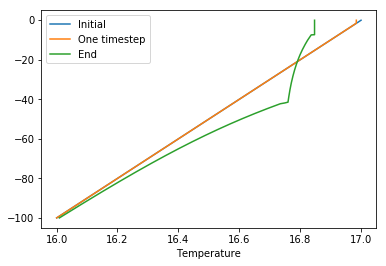

In [15]:
plt.plot(Ts[0],-z,label='Initial')
plt.plot(Ts[1],-z,label='One timestep')
plt.plot(Ts[-1],-z,label='End')
plt.legend(loc=0);
plt.xlabel('Temperature');

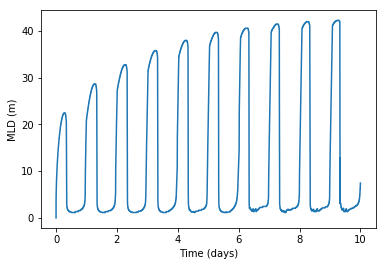

In [16]:
plt.plot(t/86400,mld_SM)
plt.ylabel('MLD (m)');
plt.xlabel('Time (days)');

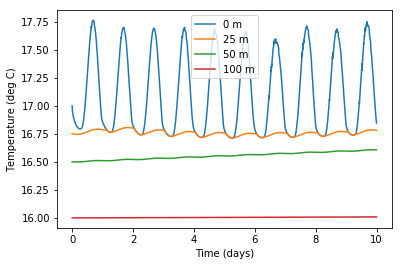

In [17]:
depths = [0,25,50,100]
for dep in depths:
    ind = np.argmin(np.abs(dep-z))
    plt.plot(t/86400,Ts[:,ind],label='%d m'%dep)
plt.ylabel('Temperature (deg C)');
plt.xlabel('Time (days)')
plt.legend(loc=0);

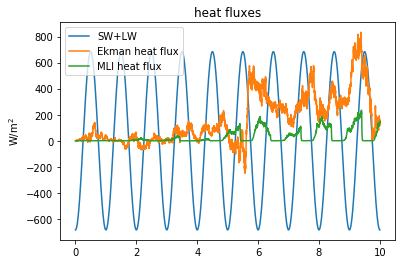

In [18]:
plt.plot(t/86400,get_insolation(t,mean=342,amp=342*2)+L,label='SW+LW')
plt.plot(t/86400,Q_Ek,label='Ekman heat flux')
plt.plot(t[1::]/86400,MLI_flux[1::]*mld[0:-1]**2,label='MLI heat flux')
plt.ylabel('W/m$^2$')
plt.title('heat fluxes')
plt.legend(loc=0);

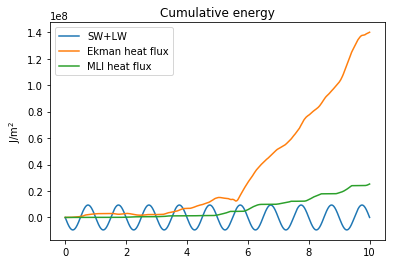

In [19]:
plt.plot(t/86400,np.cumsum(get_insolation(t,mean=342,amp=342*2)+L)*dt,label='SW+LW')
plt.plot(t/86400,np.cumsum(Q_Ek)*dt,label='Ekman heat flux')
plt.plot(t[1::]/86400,np.cumsum(MLI_flux[1::]*mld[0:-1]**2)*dt,label='MLI heat flux')
plt.ylabel('J/m$^2$')
plt.title('Cumulative energy')
plt.legend(loc=0);

## Compare MLDs

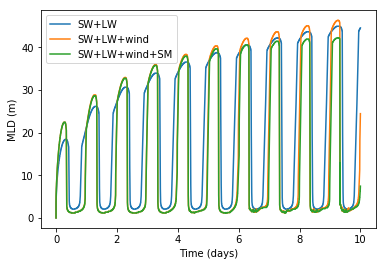

In [20]:
plt.plot(t/86400,mld,label='SW+LW')
plt.plot(t/86400,mld_1D,label='SW+LW+wind')
plt.plot(t/86400,mld_SM,label='SW+LW+wind+SM')
plt.ylabel('MLD (m)');
plt.xlabel('Time (days)');
plt.legend(loc=0);